<a href="https://colab.research.google.com/github/zyraf13/KomparasiKNN_dan_NaiveBayes/blob/main/Penelitian_Data_Mining_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

In [38]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [9]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=2000,
    filter_score_with=None
)

In [39]:
# Membaca file CSV
df = pd.read_csv('scrapped_data.csv')

In [35]:
# Display the data
print(df.head())


        userName  score                   at  \
0     Aisah Aizz      5  2023-05-25 07:56:23   
1       Noel Joe      1  2023-05-24 19:19:11   
2  Wahyu Firdaus      5  2023-05-24 15:44:35   
3  Ayuu main yuk      1  2023-05-24 12:52:16   
4           ulfa      1  2023-05-24 11:01:05   

                                             content sentiment  \
0  Kenapa spaylater dan spinjaman ngga bisa dibuk...   Positif   
1  Terlalu banyak fitur fitur SAMPAH👎 dan video² ...   Negatif   
2  Gratis Ongkir Sama Diskon Gak Ada Ya Lalu Saya...   Positif   
3  Jelek banget! Aplikasi lambat kalau di buka pa...   Negatif   
4  Benci banget setiap buka shopee kenapa lemot n...   Negatif   

                                              tokens  \
0  [Kenapa, spaylater, dan, spinjaman, ngga, bisa...   
1  [Terlalu, banyak, fitur, fitur, SAMPAH👎, dan, ...   
2  [Gratis, Ongkir, Sama, Diskon, Gak, Ada, Ya, L...   
3  [Jelek, banget, !, Aplikasi, lambat, kalau, di...   
4  [Benci, banget, setiap, buka, s

In [41]:
df = pd.DataFrame(np.array(result),columns=['review'])

df = df.join(pd.DataFrame(df.pop('review').tolist()))

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,11ecf6f5-4b2c-4d6a-a4c4-065da547380a,Ini H,https://play-lh.googleusercontent.com/a-/AD_cM...,"Aplikasi semakin lelet & lemot, terlalu berat ...",1,10174,3.03.10,2023-06-14 05:41:39,"hi ka, mkasi feedbacknya, maaf buat ga nyaman....",2023-06-14 06:23:25,3.03.10
1,4868ebce-e230-4912-95fa-08bd315c0b8b,Iwan Wid,https://play-lh.googleusercontent.com/a-/AD_cM...,"Barang yg dipesan, dikirim sesuai dengan pesan...",5,88,3.04.20,2023-07-08 09:05:54,"hi kak makasi buat bintang 5nya, maaf ya buat ...",2023-07-08 11:04:27,3.04.20
2,4105b163-a600-48ed-a190-ef94f8cf6ad6,NEKOPOI,https://play-lh.googleusercontent.com/a-/AD_cM...,"Aplikasi sangat lemot , Kadang ngefreez di lam...",1,499,3.04.20,2023-07-06 14:58:45,"Hi kak, maaf banget ya atas kendalanya, mimin ...",2023-07-06 15:46:43,3.04.20
3,501ff873-b55c-44e7-b25e-b31a471e68eb,Lola Pertiwi Mulyadi,https://play-lh.googleusercontent.com/a-/AD_cM...,"Lambat, lemot, mau chat ke penjual sering gaga...",1,3456,3.03.10,2023-06-15 01:08:53,"Hi kak, maaf ya atas kendala aplikasi lemot. M...",2023-06-15 02:16:11,3.03.10
4,aa5c099b-8b2d-4cc3-8c85-1c345cdb3bdf,Epri Yadi,https://play-lh.googleusercontent.com/a-/AD_cM...,"Tolong untuk pihak Shopee,Tolong untuk di eval...",1,1927,3.04.20,2023-06-29 06:39:11,"Hai kak, maaf ya. Terkait kendala, mimin saran...",2023-06-29 07:18:27,3.04.20


In [42]:
len(df.index) #count the number of data we got

2000

In [43]:
def convert_sentiment(score):
    if score <= 2:
        return 'Negatif'
    else:
        return 'Positif'

In [44]:
df['sentiment'] = df['score'].apply(convert_sentiment)

In [45]:
print(df[['userName', 'score', 'sentiment', 'content']].head())

               userName  score sentiment  \
0                 Ini H      1   Negatif   
1              Iwan Wid      5   Positif   
2               NEKOPOI      1   Negatif   
3  Lola Pertiwi Mulyadi      1   Negatif   
4             Epri Yadi      1   Negatif   

                                             content  
0  Aplikasi semakin lelet & lemot, terlalu berat ...  
1  Barang yg dipesan, dikirim sesuai dengan pesan...  
2  Aplikasi sangat lemot , Kadang ngefreez di lam...  
3  Lambat, lemot, mau chat ke penjual sering gaga...  
4  Tolong untuk pihak Shopee,Tolong untuk di eval...  


In [46]:
# Menentukan jumlah ulasan positif dan negatif
positive_count = df[df['sentiment'] == 'Positif'].shape[0]
negative_count = df[df['sentiment'] == 'Negatif'].shape[0]

# Menampilkan hasil
print("Jumlah ulasan positif:", positive_count)
print("Jumlah ulasan negatif:", negative_count)

Jumlah ulasan positif: 707
Jumlah ulasan negatif: 1293


In [47]:
df[['userName', 'score', 'sentiment', 'at', 'content']].head()  #preview userName, rating, date-time, and reviews only

,userName,score,sentiment,at,content
0,Ini H,1,Negatif,2023-06-14 05:41:39,"Aplikasi semakin lelet & lemot, terlalu berat ..."
1,Iwan Wid,5,Positif,2023-07-08 09:05:54,"Barang yg dipesan, dikirim sesuai dengan pesan..."
2,NEKOPOI,1,Negatif,2023-07-06 14:58:45,"Aplikasi sangat lemot , Kadang ngefreez di lam..."
3,Lola Pertiwi Mulyadi,1,Negatif,2023-06-15 01:08:53,"Lambat, lemot, mau chat ke penjual sering gaga..."
4,Epri Yadi,1,Negatif,2023-06-29 06:39:11,"Tolong untuk pihak Shopee,Tolong untuk di eval..."


In [48]:
#Run This Code to Sort the Data By Date

new_df = df[['userName', 'score', 'sentiment', 'at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,sentiment,at,content
141,Varendra nigel G.,1,Negatif,2023-07-08 13:20:33,"Sangat lelet, sekarang gw beralih ke toko ijo ..."
267,Angga Saputra,3,Positif,2023-07-08 12:54:01,Saat ini ada kendala untuk pesan barang sebagi...
35,Iis Nurhayati,1,Negatif,2023-07-08 12:18:11,Gimana sih .. Aplikasinya baru di update tapi ...
450,Victoria Ayu Yosefien,1,Negatif,2023-07-08 12:10:56,"Awalnya bagus pakai shopee, lama"" jengkel bgt...."
382,ADITYA FENDI KRISTIANTO (ADIT),3,Positif,2023-07-08 11:34:15,"Mohon maaf hp saya samsung a23 5g, waktu mau m..."


In [49]:
my_df = sorted_df[['userName', 'score','sentiment', 'at', 'content']] #get userName, rating, date-time, and reviews only

In [50]:
my_df.head()

,userName,score,sentiment,at,content
141,Varendra nigel G.,1,Negatif,2023-07-08 13:20:33,"Sangat lelet, sekarang gw beralih ke toko ijo ..."
267,Angga Saputra,3,Positif,2023-07-08 12:54:01,Saat ini ada kendala untuk pesan barang sebagi...
35,Iis Nurhayati,1,Negatif,2023-07-08 12:18:11,Gimana sih .. Aplikasinya baru di update tapi ...
450,Victoria Ayu Yosefien,1,Negatif,2023-07-08 12:10:56,"Awalnya bagus pakai shopee, lama"" jengkel bgt...."
382,ADITYA FENDI KRISTIANTO (ADIT),3,Positif,2023-07-08 11:34:15,"Mohon maaf hp saya samsung a23 5g, waktu mau m..."


In [51]:
filtered_df = sorted_df.loc[sorted_df['sentiment'] == 'Positif']
print(filtered_df.head())

                           userName  score sentiment                  at  \
267                   Angga Saputra      3   Positif 2023-07-08 12:54:01   
382  ADITYA FENDI KRISTIANTO (ADIT)      3   Positif 2023-07-08 11:34:15   
972                     ineu kholbu      5   Positif 2023-07-08 11:22:20   
690                        Rotan Ku      5   Positif 2023-07-08 11:17:21   
362                  MUJAHIDA SABIR      5   Positif 2023-07-08 11:15:25   

                                               content  
267  Saat ini ada kendala untuk pesan barang sebagi...  
382  Mohon maaf hp saya samsung a23 5g, waktu mau m...  
972  Sekarang ongkirnya hanya potongan saja dan kec...  
690  Banyak yg eror masalah claim koin harian eror ...  
362  Makin suka belanja dishopee, banyak pilihan pr...  


In [52]:
!pip install Sastrawi

In [53]:
import nltk

from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Menginisialisasi tokenisasi menggunakan word_tokenize dari nltk
nltk.download('punkt')  # Mengunduh data yang diperlukan untuk word_tokenize

# Tokenisasi teks dalam kolom 'content'
df['tokens'] = df['content'].apply(lambda x: word_tokenize(x))

# Menampilkan hasil tokenisasi
print(df[['content', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Barang yg dipesan, dikirim sesuai dengan pesan...   
2  Aplikasi sangat lemot , Kadang ngefreez di lam...   
3  Lambat, lemot, mau chat ke penjual sering gaga...   
4  Tolong untuk pihak Shopee,Tolong untuk di eval...   

                                              tokens  
0  [Aplikasi, semakin, lelet, &, lemot, ,, terlal...  
1  [Barang, yg, dipesan, ,, dikirim, sesuai, deng...  
2  [Aplikasi, sangat, lemot, ,, Kadang, ngefreez,...  
3  [Lambat, ,, lemot, ,, mau, chat, ke, penjual, ...  
4  [Tolong, untuk, pihak, Shopee, ,, Tolong, untu...  


In [54]:
import string

In [55]:
# Fungsi untuk memfilter kata
def filter_words(text):
    # Menghapus tanda baca dan simbol
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Mengubah huruf menjadi huruf kecil
    text = text.lower()
    return text

In [56]:
# Memfilter kata pada kolom 'content'
df['filtered_content'] = df['content'].apply(filter_words)

In [57]:
# Menampilkan hasil
print(df[['content', 'filtered_content']].head())

                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Barang yg dipesan, dikirim sesuai dengan pesan...   
2  Aplikasi sangat lemot , Kadang ngefreez di lam...   
3  Lambat, lemot, mau chat ke penjual sering gaga...   
4  Tolong untuk pihak Shopee,Tolong untuk di eval...   

                                    filtered_content  
0  aplikasi semakin lelet  lemot terlalu berat  s...  
1  barang yg dipesan dikirim sesuai dengan pesana...  
2  aplikasi sangat lemot  kadang ngefreez di lama...  
3  lambat lemot mau chat ke penjual sering gagal ...  
4  tolong untuk pihak shopeetolong untuk di evalu...  


In [58]:
keyword = 'lemot'
filtered_df = df[df['tokens'].apply(lambda x: keyword in x)]
print(filtered_df[['content', 'tokens']].head())

                                              content  \
0   Aplikasi semakin lelet & lemot, terlalu berat ...   
2   Aplikasi sangat lemot , Kadang ngefreez di lam...   
3   Lambat, lemot, mau chat ke penjual sering gaga...   
4   Tolong untuk pihak Shopee,Tolong untuk di eval...   
11  ga ngerti lagi sama Shopee yang sekarang, lemo...   

                                               tokens  
0   [Aplikasi, semakin, lelet, &, lemot, ,, terlal...  
2   [Aplikasi, sangat, lemot, ,, Kadang, ngefreez,...  
3   [Lambat, ,, lemot, ,, mau, chat, ke, penjual, ...  
4   [Tolong, untuk, pihak, Shopee, ,, Tolong, untu...  
11  [ga, ngerti, lagi, sama, Shopee, yang, sekaran...  


In [59]:
stemmer = StemmerFactory().create_stemmer()

In [61]:
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

In [37]:
print(df_busu[['content', 'stemmed_tokens']].head())

                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Aplikasi sangat lemot , Kadang ngefreez di lam...   
2  Lambat, lemot, mau chat ke penjual sering gaga...   
3  Tolong untuk pihak Shopee,Tolong untuk di eval...   
4  Aplikasi lambat, lamban, dan lebih baik tidak ...   

                                      stemmed_tokens  
0  [aplikasi, makin, lelet, , lot, , terlalu, ber...  
1  [aplikasi, sangat, lot, , kadang, ngefreez, di...  
2  [lambat, , lot, , mau, chat, ke, jual, sering,...  
3  [tolong, untuk, pihak, shopee, , tolong, untuk...  
4  [aplikasi, lambat, , lamban, , dan, lebih, bai...  


**Algoritma KNN**

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [112]:
# Mengambil 1000 dataset pertama
df_subset = df.head(1000)

In [100]:
# Mengambil kolom yang dibutuhkan (misalnya, 'stemmed_tokens' dan 'sentiment')
data = df[['stemmed_tokens', 'sentiment']]

In [101]:
# Menggabungkan token-token dalam list menjadi satu string
data['text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-101-6329eef40417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))


In [113]:
# Memisahkan fitur (X) dan label (y)
X = df_subset['stemmed_tokens']
y = df_subset['sentiment']

In [114]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Membangun vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.astype('U'))  # Ubah X_train menjadi format string
X_test_vectorized = vectorizer.transform(X_test.astype('U'))  # Ubah X_test menjadi format string

In [116]:
# Melatih model KNN
k = 5  # Jumlah tetangga terdekat yang digunakan
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [117]:
# Memprediksi label menggunakan data pengujian
y_pred_knn = knn.predict(X_test_vectorized)

In [118]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

In [119]:
# Menampilkan laporan klasifikasi secara keseluruhan
report_overall = classification_report(y_test, y_pred_knn, target_names=['Negatif', 'Positif'])
print("Klasifikasi Algoritma KNN:")
print(report_overall)
# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

Klasifikasi Algoritma KNN:
              precision    recall  f1-score   support

     Negatif       0.72      0.91      0.80       134
     Positif       0.60      0.27      0.37        66

    accuracy                           0.70       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.68      0.70      0.66       200

Confusion Matrix:
[[122  12]
 [ 48  18]]


In [75]:
# Menghitung akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN: {:.2f}%".format(accuracy_knn * 100))

Akurasi KNN: 70.00%


**Metode Naive Bayes**

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [81]:
# Mengambil 1000 dataset pertama
df_subset = df.head(1000)

In [82]:
# Memisahkan fitur (X) dan label (y)
X = df_subset['stemmed_tokens']
y = df_subset['sentiment']

In [85]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)


In [86]:
# Bangun vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [87]:
# Latih model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [88]:
# Lakukan prediksi pada data pengujian
y_pred_nb = naive_bayes.predict(X_test_vectorized)

In [90]:
#Menampilkan laporan klasifikasi keseluruhan
report_overall = classification_report(y_test, y_pred_nb, target_names=['Negatif', 'Positif'])
print("Klasifikasi naive bayes:")
print(report_overall)

Klasifikasi naive bayes:
              precision    recall  f1-score   support

     Negatif       0.69      1.00      0.82       261
     Positif       0.96      0.17      0.29       139

    accuracy                           0.71       400
   macro avg       0.83      0.58      0.56       400
weighted avg       0.79      0.71      0.64       400



In [91]:
# Hitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi Naive Bayes: {:.2f}%".format(accuracy_nb * 100))

Akurasi Naive Bayes: 71.00%


**Banyaknya Data TEST yang digunakan**

In [120]:
# Menghitung jumlah data yang digunakan
num_data = len(y_test)

In [121]:
# Menampilkan jumlah data
print("Jumlah data yang digunakan:", num_data)

Jumlah data yang digunakan: 200


In [123]:
# Menghitung jumlah ulasan positif
num_positif = sum(y_test == 'Positif')

In [124]:
# Menghitung jumlah ulasan negatif
num_negatif = sum(y_test == 'Negatif')

In [125]:
# Menampilkan jumlah ulasan positif dan negatif
print("Jumlah ulasan positif:", num_positif)
print("Jumlah ulasan negatif:", num_negatif)

Jumlah ulasan positif: 66
Jumlah ulasan negatif: 134


**Komparasi pada model KNN dan Naive Bayes**

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
positive_count = df_subset[df_subset['sentiment'] == 'Positif'].shape[0]
negative_count = df_subset[df_subset['sentiment'] == 'Negatif'].shape[0]

print("Jumlah Ulasan Positif:", positive_count)
print("Jumlah Ulasan Negatif:", negative_count)

Jumlah Ulasan Positif: 319
Jumlah Ulasan Negatif: 681


In [94]:
# Menyiapkan data untuk grafik
models = ['KNN', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_nb]

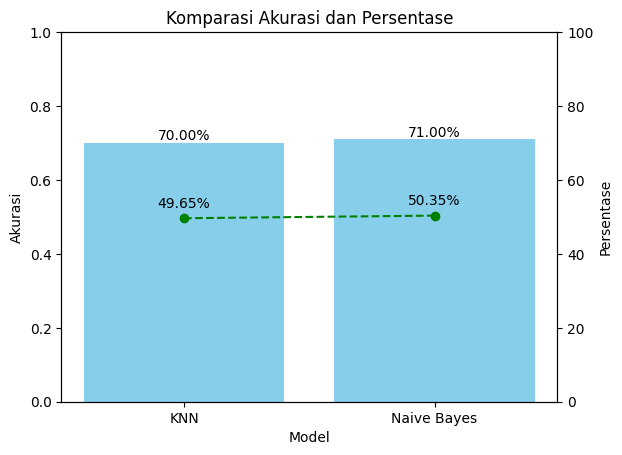

In [126]:
# Membuat grafik
fig, ax1 = plt.subplots()

# Menggambar bar grafik akurasi
bar1 = ax1.bar(models, accuracies, color='skyblue')
ax1.set_xlabel('Model')
ax1.set_ylabel('Akurasi')
ax1.set_ylim(0, 1)

# Menambahkan label persentase pada batang grafik akurasi
for bar in bar1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.2f}%', ha='center', va='bottom')

# Menghitung presentase akurasi
total = sum(accuracies)
percentages = [(acc / total) * 100 for acc in accuracies]

# Menyiapkan data untuk grafik persentase
ax2 = ax1.twinx()
ax2.plot(models, percentages, marker='o', color='green', linestyle='--')
ax2.set_ylabel('Persentase')
ax2.set_ylim(0, 100)

# Menambahkan label persentase pada garis grafik persentase
for i, percentage in enumerate(percentages):
    ax2.text(models[i], percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom')

# Menampilkan grafik
plt.title('Komparasi Akurasi dan Persentase')
plt.show()

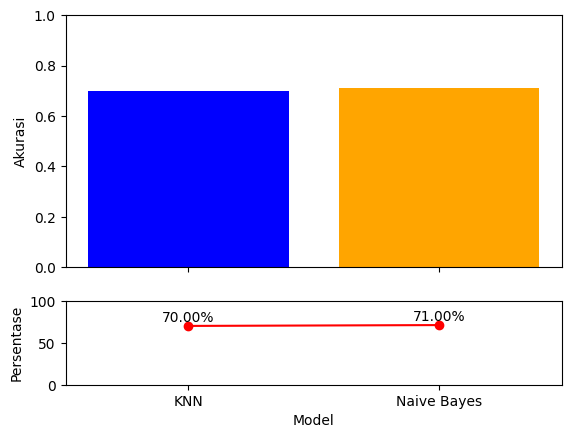

In [127]:
# Mendefinisikan data untuk grafik
models = ['KNN', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_nb]

# Membuat subplot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Menampilkan grafik akurasi
ax1.bar(models, accuracies, color=['blue', 'orange'])
ax1.set_ylabel('Akurasi')
ax1.set_ylim(0, 1)

# Menghitung persentase akurasi
percentages = [accuracy * 100 for accuracy in accuracies]

# Menampilkan garis persentase
ax2.plot(models, percentages, marker='o', color='red')
ax2.set_ylabel('Persentase')
ax2.set_ylim(0, 100)

# Menambahkan label persentase pada garis grafik persentase
for i, percentage in enumerate(percentages):
    ax2.text(models[i], percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom')

# Menampilkan grafik
plt.xlabel('Model')
plt.show()
